In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')
data.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
data['area'] = np.log(data['area'] + 1)

In [5]:
data.shape

(517, 13)

In [6]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [7]:
data.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,1.111026
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,1.398436
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.418710
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,2.024193
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,6.995620


In [8]:
features= data.iloc[:, : -1]
predictions= data.iloc[:, -1]

In [9]:
features.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0


In [10]:
predictions.head()


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: area, dtype: float64

In [13]:
df_encoded = pd.get_dummies(data, columns=['month', 'day'], drop_first=True)

# Now, you can proceed with standard scaling the entire dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(df_encoded)

# Convert the scaled features back to a DataFrame
features_scaled = pd.DataFrame(features_scaled, columns=df_encoded.columns)

# Check the resulting DataFrame
print(features_scaled.head())

          X         Y      FFMC       DMC        DC       ISI      temp  \
0  1.008313  0.569860 -0.805959 -1.323326 -1.830477 -0.860946 -1.842640   
1  1.008313 -0.244001 -0.008102 -1.179541  0.488891 -0.509688 -0.153278   
2  1.008313 -0.244001 -0.008102 -1.049822  0.560715 -0.509688 -0.739383   
3  1.440925  1.383722  0.191362 -1.212361 -1.898266 -0.004756 -1.825402   
4  1.440925  1.383722 -0.243833 -0.931043 -1.798600  0.126966 -1.291012   

         RH      wind      rain  ...  month_may  month_nov  month_oct  \
0  0.411724  1.498614 -0.073268  ...  -0.062318  -0.044023  -0.172860   
1 -0.692456 -1.741756 -0.073268  ...  -0.062318  -0.044023   5.785038   
2 -0.692456 -1.518282 -0.073268  ...  -0.062318  -0.044023   5.785038   
3  3.233519 -0.009834  0.603155  ...  -0.062318  -0.044023  -0.172860   
4  3.356206 -1.238940 -0.073268  ...  -0.062318  -0.044023  -0.172860   

   month_sep   day_mon   day_sat   day_sun   day_thu   day_tue   day_wed  
0  -0.706081 -0.408709 -0.440449 -0

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features_scaled, predictions, test_size=0.2, random_state=42, shuffle=True)

In [17]:

Train_data = pd.concat([X_train, y_train], axis='columns')
Train_data.columns = list(X_train.columns) + ['target_column']
Train_data

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,target_column
329,-0.289524,-1.057862,0.282028,-0.133975,0.821382,-0.136477,0.794833,-1.060516,-0.009834,-0.073268,...,-0.044023,-0.17286,1.416268,-0.408709,2.270410,-0.474467,-0.365748,-0.375873,-0.341512,1.465568
173,-0.289524,-0.244001,0.046297,0.244241,0.559101,-0.443828,-0.204993,-0.324396,-1.015466,-0.073268,...,-0.044023,-0.17286,1.416268,2.446730,-0.440449,-0.474467,-0.365748,-0.375873,-0.341512,1.403643
272,-1.154748,0.569860,0.263895,0.652153,0.444908,1.158784,0.225966,0.166351,-0.009834,-0.073268,...,-0.044023,-0.17286,-0.706081,-0.408709,-0.440449,-0.474467,-0.365748,2.660475,-0.341512,1.408545
497,-0.722136,-0.244001,0.989220,1.097573,0.497365,1.158784,2.311811,-1.060516,-1.015466,-0.073268,...,-0.044023,-0.17286,-0.706081,-0.408709,-0.440449,-0.474467,-0.365748,2.660475,-0.341512,2.752386
182,0.143088,-0.244001,-0.697161,-1.488991,-2.016091,-1.124389,-1.118628,0.534411,-1.015466,-0.073268,...,-0.044023,-0.17286,-0.706081,-0.408709,-0.440449,2.107630,-0.365748,-0.375873,-0.341512,1.998774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.289524,0.569860,0.662824,-0.402790,0.582505,1.510041,-0.204993,-0.447083,-0.233308,-0.073268,...,-0.044023,-0.17286,1.416268,-0.408709,-0.440449,-0.474467,-0.365748,-0.375873,-0.341512,0.000000
106,-0.289524,0.569860,0.136963,-1.252996,-1.911178,-0.334060,-0.118801,-0.937830,-0.512650,-0.073268,...,-0.044023,-0.17286,-0.706081,-0.408709,-0.440449,-0.474467,2.734120,-0.375873,-0.341512,0.000000
270,-1.154748,-1.871724,0.263895,0.652153,0.444908,1.158784,0.501780,0.718441,-0.512650,-0.073268,...,-0.044023,-0.17286,-0.706081,-0.408709,-0.440449,-0.474467,-0.365748,2.660475,-0.341512,0.418710
435,-1.154748,0.569860,0.028164,-0.409042,-0.691372,-0.751178,0.846548,0.411724,-1.238940,-0.073268,...,-0.044023,-0.17286,-0.706081,-0.408709,2.270410,-0.474467,-0.365748,-0.375873,-0.341512,0.000000


In [18]:
Train_data.describe()


,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,target_column
count,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,...,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000
mean,-0.003560,0.018090,-0.020176,0.020417,0.007558,-0.054563,-0.000345,0.016334,-0.011457,0.000434,...,0.011086,0.014677,0.023637,0.033780,-0.000673,0.006941,-0.012979,0.006428,-0.016921,1.103601
std,0.992508,0.983923,1.079508,1.028594,1.005602,0.855746,0.998170,1.017687,0.996337,1.088099,...,1.119929,1.041528,1.009304,1.034551,1.000596,1.006848,0.985619,1.008517,0.978910,1.376300
min,-1.587360,-1.871724,-13.045818,-1.715608,-2.179108,-1.980578,-2.876943,-1.796637,-1.741756,-0.073268,...,-0.044023,-0.172860,-0.706081,-0.408709,-0.440449,-0.474467,-0.365748,-0.375873,-0.341512,0.000000
25%,-0.722136,-0.244001,-0.080635,-0.626282,-0.444828,-0.575549,-0.584238,-0.753800,-0.736124,-0.073268,...,-0.044023,-0.172860,-0.706081,-0.408709,-0.440449,-0.474467,-0.365748,-0.375873,-0.341512,0.000000
50%,-0.289524,-0.244001,0.173229,-0.038640,0.470330,-0.136477,0.036344,-0.140366,-0.009834,-0.073268,...,-0.044023,-0.172860,-0.706081,-0.408709,-0.440449,-0.474467,-0.365748,-0.375873,-0.341512,0.431782
75%,1.008313,0.569860,0.408960,0.492739,0.674505,0.346501,0.674164,0.534411,0.772325,-0.073268,...,-0.044023,-0.172860,1.416268,-0.408709,-0.440449,-0.474467,-0.365748,-0.375873,-0.341512,2.024193
max,1.873537,3.825306,1.007353,2.819865,1.261610,3.002885,2.484195,3.417549,3.007063,21.572284,...,22.715633,5.785038,1.416268,2.446730,2.270410,2.107630,2.734120,2.660475,2.928152,6.616440


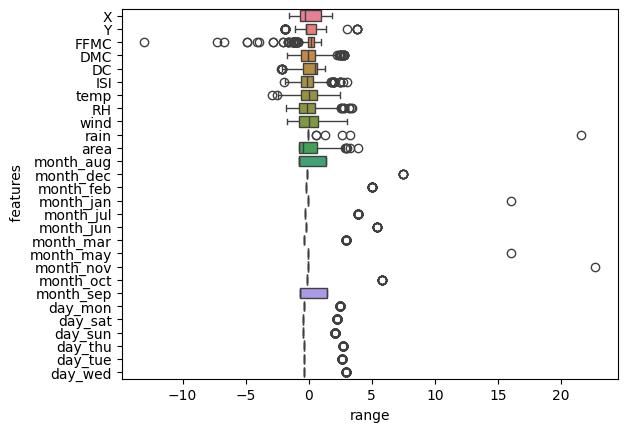

In [19]:
import seaborn as sns
sns.boxplot(data= X_train, orient="h").set(xlabel= "range", ylabel=" features")
plt.show()

In [20]:
corr_mat= Train_data.corr(method= "pearson")
corr_mat

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,month_nov,month_oct,month_sep,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed,target_column
X,1.000000,0.529508,-0.037199,-0.034402,-0.099985,-0.039236,-0.069575,0.131535,0.032861,0.068566,...,0.028788,0.075084,-0.128728,0.057510,0.010639,-0.032282,-0.026845,0.021109,-0.014494,0.077387
Y,0.529508,1.000000,-0.038022,0.029582,-0.085578,0.015593,0.011271,0.045170,-0.015438,0.036829,...,-0.053940,-0.013626,-0.129728,-0.008922,-0.003134,0.016493,0.024401,0.007581,0.032165,0.051651
FFMC,-0.037199,-0.038022,1.000000,0.369869,0.318263,0.580653,0.413136,-0.295827,-0.027535,0.055683,...,-0.091419,-0.004978,0.064004,-0.046969,-0.005787,-0.095015,0.093901,0.000936,0.071671,0.060374
DMC,-0.034402,0.029582,0.369869,1.000000,0.683103,0.363387,0.442685,0.097735,-0.078025,0.067075,...,-0.081827,-0.193795,0.127005,-0.122874,0.023023,0.031309,0.085160,-0.021440,0.014507,0.094123
DC,-0.099985,-0.085578,0.318263,0.683103,1.000000,0.292579,0.475584,-0.019278,-0.192572,0.028957,...,-0.087704,0.095649,0.543043,-0.052414,-0.029183,0.001044,0.021267,0.025663,0.048440,0.065856
ISI,-0.039236,0.015593,0.580653,0.363387,0.292579,1.000000,0.427872,-0.132449,0.123776,0.092557,...,-0.097098,-0.066788,-0.085348,-0.145362,-0.008940,-0.042845,0.038508,0.081545,0.085068,-0.004163
temp,-0.069575,0.011271,0.413136,0.442685,0.475584,0.427872,1.000000,-0.546717,-0.222612,0.073452,...,-0.060373,-0.057388,0.081376,-0.122960,0.054352,-0.005173,0.087147,0.043120,0.051280,0.038279
RH,0.131535,0.045170,-0.295827,0.097735,-0.019278,-0.132449,-0.546717,1.000000,0.103825,0.087408,...,-0.040301,-0.072985,-0.049142,-0.006657,-0.048417,0.163702,-0.141751,0.000514,-0.077569,-0.023247
wind,0.032861,-0.015438,-0.027535,-0.078025,-0.192572,0.123776,-0.222612,0.103825,1.000000,0.047322,...,0.013910,-0.031626,-0.202016,-0.052644,-0.055330,0.026261,-0.056775,0.037498,0.000996,0.030784
rain,0.068566,0.036829,0.055683,0.067075,0.028957,0.092557,0.073452,0.087408,0.047322,1.000000,...,-0.003341,-0.012226,-0.049091,-0.029041,-0.029843,-0.013117,-0.024302,0.146887,-0.017475,0.032201


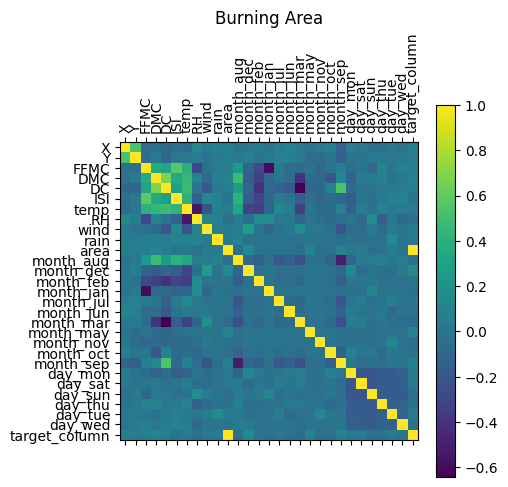

In [24]:
plt.matshow(corr_mat)
plt.title("Burning Area")
plt.xticks(range(len(corr_mat.columns)),corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)),corr_mat.columns)
# plt.figure(figsize=[15,15])
plt.colorbar()
plt.show()

This shows that only the area variable is solely affecting the Target_column

IndexError: index 6 is out of bounds for axis 0 with size 6

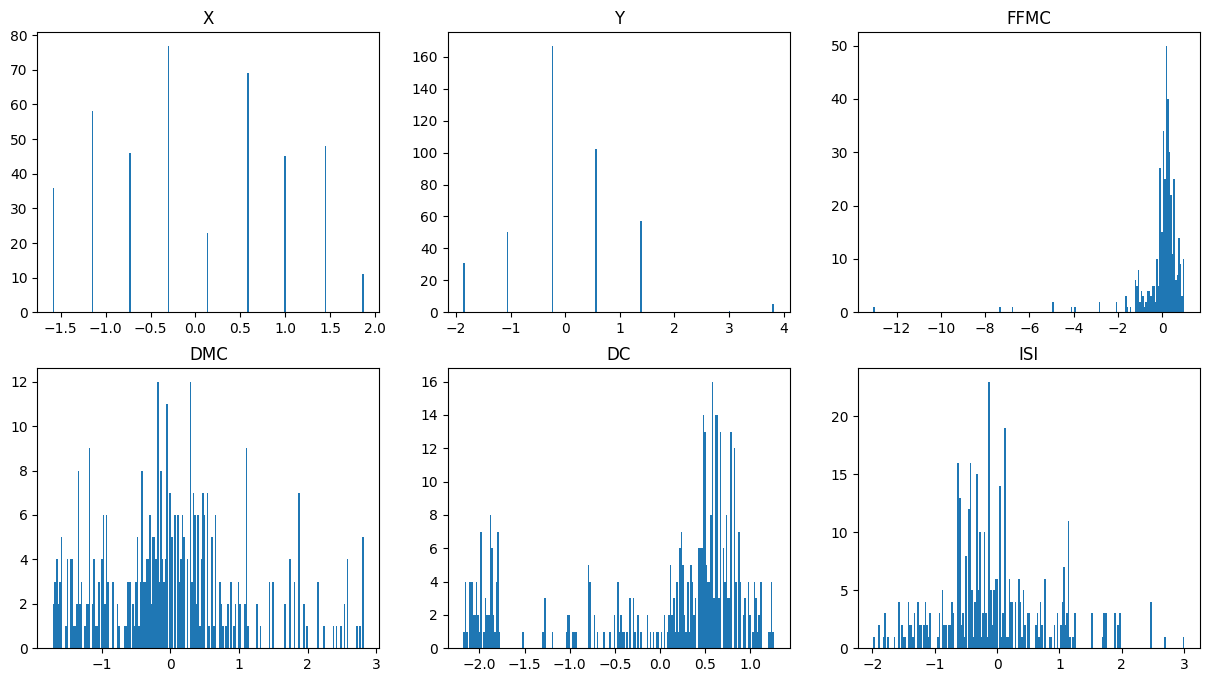

In [31]:
fig, axs = plt.subplots(2, 3, figsize=(15, 8))
axs = axs.flatten()

for i, col in enumerate(Train_data.columns[:-2]):
    axs[i].hist(Train_data[col], bins=200)
    axs[i].set_title(col)

plt.tight_layout()
plt.show()


In [27]:
unique_values= Train_data.nunique()
unique_values

X                  9
Y                  7
FFMC             102
DMC              194
DC               197
ISI              108
temp             180
RH                73
wind              20
rain               6
area             205
month_aug          2
month_dec          2
month_feb          2
month_jan          2
month_jul          2
month_jun          2
month_mar          2
month_may          2
month_nov          2
month_oct          2
month_sep          2
day_mon            2
day_sat            2
day_sun            2
day_thu            2
day_tue            2
day_wed            2
target_column    205
dtype: int64

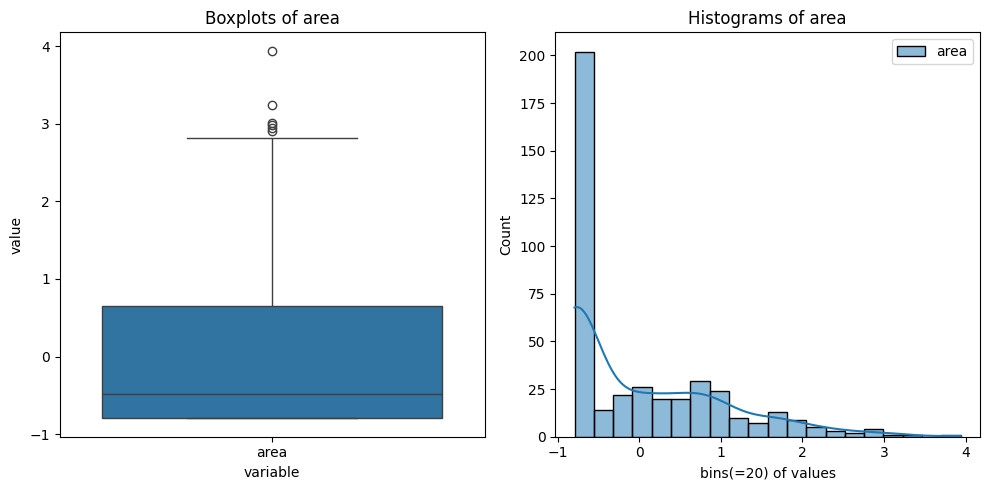

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs = axs.flatten()

sns.boxplot(x="variable", y="value", data=pd.melt(Train_data[["area"]]), ax=axs[0])
axs[0].set_title("Boxplots of area")

sns.histplot(data=Train_data[["area"]], ax=axs[1], bins=20, kde=True)
axs[1].set(xlabel='bins(=20) of values')
axs[1].set_title("Histograms of area")

plt.tight_layout()
plt.show()

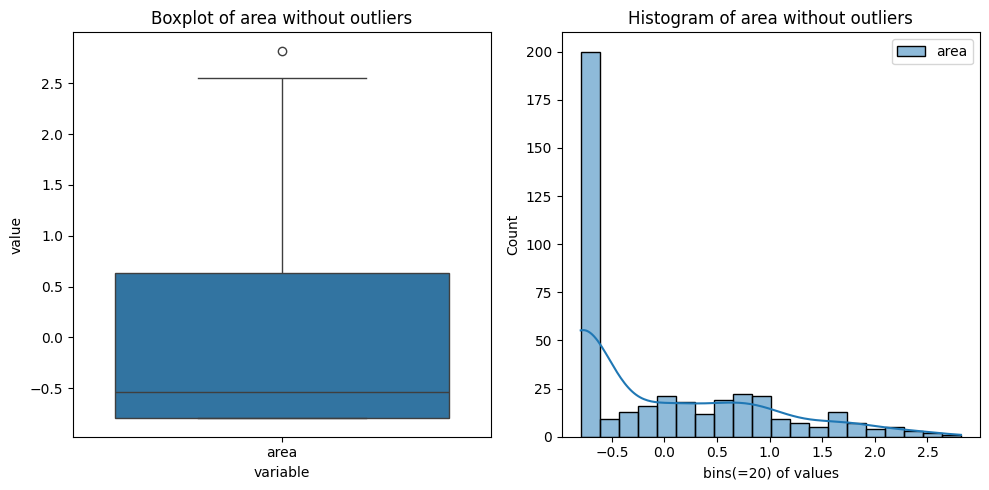

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

# Remove outliers from the 'area' column
Train_data_cleaned = remove_outliers_iqr(Train_data, 'area')

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs = axs.flatten()

# Boxplot without outliers
sns.boxplot(x="variable", y="value", data=pd.melt(Train_data_cleaned[["area"]]), ax=axs[0])
axs[0].set_title("Boxplot of area without outliers")

# Histogram without outliers
sns.histplot(data=Train_data_cleaned[["area"]], ax=axs[1], bins=20, kde=True)
axs[1].set(xlabel='bins(=20) of values')
axs[1].set_title("Histogram of area without outliers")

plt.tight_layout()
plt.show()


In [37]:
from sklearn.neighbors import KNeighborsRegressor

model =KNN= KNeighborsRegressor(n_neighbors=7)
model.fit(X_train,y_train)
y_pred_train= model.predict(X_train)
y_pred= model.predict(X_test)

In [38]:

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Print the evaluation metrics on train data
print("Evaluation metrics: Train Data")
print("Mean absolute error: ", mae_train)
print("Mean squared error: ", mse_train)
print("R-squared score: ", r2_train)

Evaluation metrics: Train Data
Mean absolute error:  0.6999458146851528
Mean squared error:  0.8288236288205831
R-squared score:  0.5613794950811204


In [39]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Print the evaluation metrics on test data
print("Evaluation metrics: Test Data")
print("Mean absolute error: ", mae)
print("Mean squared error: ", mse)
print("R-squared score: ", r2)

Evaluation metrics: Test Data
Mean absolute error:  0.7794494180553057
Mean squared error:  1.0331181868268304
R-squared score:  0.5299439237693196


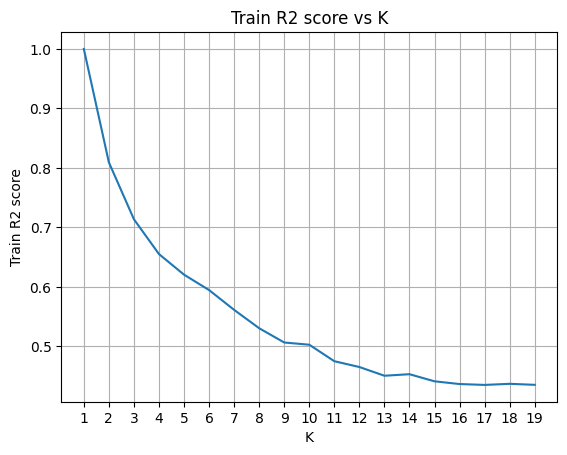

In [54]:
k_values = list(range(1, 20)) #k ranges between 1 and 19
model_best = KNeighborsRegressor() #Notice that the value of K is not inserted here
r2_values, mse_values = [], []
for k in k_values:
  model_best.set_params(n_neighbors=k)
  model_best.fit(X_train, y_train)
  y_pred_current = model_best.predict(X_train)
  r2_current = r2_score(y_train, y_pred_current)
  r2_values.append(r2_current)
  mse_current = mean_squared_error(y_train, y_pred_current)
  mse_values.append(mse_current)


# Plot the variation of R2 for various values of K
plt.plot(k_values, r2_values)
plt.title("Train R2 score vs K")
plt.xlabel("K")
plt.ylabel("Train R2 score")
plt.xticks(k_values)
plt.grid()
plt.show()

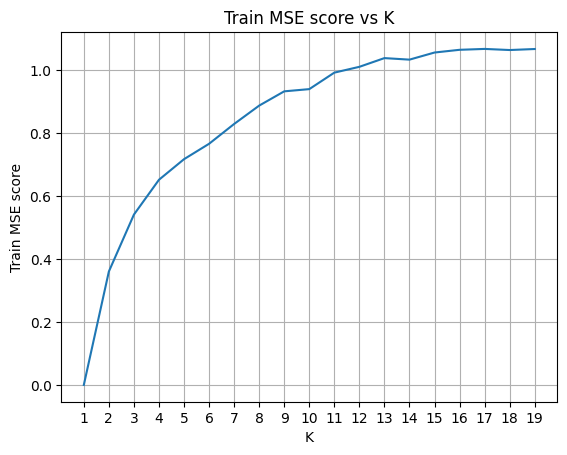

In [55]:
plt.plot(k_values, mse_values)
plt.title("Train MSE score vs K")
plt.xlabel("K")
plt.ylabel("Train MSE score")
plt.xticks(k_values)
plt.grid()
plt.show()

In [61]:
from sklearn.linear_model import Ridge

# Define the Ridge regression model with regularization (alpha)
model = Ridge(alpha=100)  # You can adjust the alpha value as needed

# Train the Ridge model
model.fit(X_train, y_train)

# Evaluate the model
train_r2 = model.score(X_train, y_train)
test_r2 = model.score(X_test, y_test)

print("Train R2 score:", train_r2)
print("Test R2 score:", test_r2)
# k_best = k_values[np.argmax(r2_values)]
# model_best.set_params(n_neighbors=k_best)
# model_best.fit(X_train, y_train)
# y_train_pred_best = model_best.predict(X_train)
# y_test_pred_best = model_best.predict(X_test)
# r2_best_train = r2_score(y_train, y_train_pred_best)
# r2_best_test = r2_score(y_test, y_test_pred_best)
# print("Best K: ", k_best)
# print('Train R2 score: ', r2_best_train)
# print("Test R2 score: ",r2_best_test)

Train R2 score: 0.9591790271651378
Test R2 score: 0.9558915581154972


In [63]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

# Define a range of K values to experiment with
k_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,11,12,13,14,15,16,17,18,19,20]

# Initialize variables to store the best K and R2 scores
best_k = None
best_train_r2 = -1.0
best_test_r2 = -1.0

# Iterate through different K values
for k in k_values:
    # Create a KNN regression model with the current K value
    model = KNeighborsRegressor(n_neighbors=k)
    
    # Train the KNN model
    model.fit(X_train, y_train)
    
    # Make predictions on the training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Calculate R-squared (R2) scores for training and test data
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    
    # Print R2 scores for the current K value
    print(f"K={k}, Train R2 score: {train_r2:.4f}, Test R2 score: {test_r2:.4f}")
    
    # Check if the current model has a better test R2 score
    if test_r2 > best_test_r2:
        best_k = k
        best_train_r2 = train_r2
        best_test_r2 = test_r2

# Print the best K and corresponding R2 scores
print(f"Best K: {best_k}")
print(f"Train R2 score for best K: {best_train_r2:.4f}")
print(f"Test R2 score for best K: {best_test_r2:.4f}")

# Train the final KNN model with the best K
final_model = KNeighborsRegressor(n_neighbors=best_k)
final_model.fit(X_train, y_train)


K=1, Train R2 score: 1.0000, Test R2 score: 0.4499
K=2, Train R2 score: 0.8093, Test R2 score: 0.5059
K=3, Train R2 score: 0.7137, Test R2 score: 0.5353
K=4, Train R2 score: 0.6551, Test R2 score: 0.5292
K=5, Train R2 score: 0.6206, Test R2 score: 0.5513
K=6, Train R2 score: 0.5947, Test R2 score: 0.5434
K=7, Train R2 score: 0.5614, Test R2 score: 0.5299
K=8, Train R2 score: 0.5305, Test R2 score: 0.5314
K=9, Train R2 score: 0.5065, Test R2 score: 0.5117
K=10, Train R2 score: 0.5028, Test R2 score: 0.4933
K=11, Train R2 score: 0.4751, Test R2 score: 0.4913
K=12, Train R2 score: 0.4653, Test R2 score: 0.4915
K=13, Train R2 score: 0.4507, Test R2 score: 0.4897
K=14, Train R2 score: 0.4532, Test R2 score: 0.4886
K=15, Train R2 score: 0.4413, Test R2 score: 0.4894
K=16, Train R2 score: 0.4367, Test R2 score: 0.4734
K=17, Train R2 score: 0.4352, Test R2 score: 0.4608
K=18, Train R2 score: 0.4371, Test R2 score: 0.4484
K=19, Train R2 score: 0.4354, Test R2 score: 0.4475
K=20, Train R2 score:

KNeighborsRegressor()

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create a Random Forest Regressor model
model = RandomForestRegressor(n_estimators=100, random_state=0)  # You can adjust the number of estimators as needed

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on both the training and test sets
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate R-squared (R2) scores for training and test sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train R2 score:", train_r2)
print("Test R2 score:", test_r2)


Train R2 score: 0.9995225713881909
Test R2 score: 0.9895512359557653


In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor

# Load the dataset
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')

# Define features (X) and target (y)
X = data.drop(columns=['area'])  # Exclude 'area' as a feature
y = data['area']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a KNN regressor
knn = KNeighborsRegressor()

# Define a parameter grid for hyperparameter tuning (k values)
param_grid = {'n_neighbors': range(1, 21)}  # Try k values from 1 to 20

# Perform grid search with cross-validation to find the best k
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best k value
best_k = grid_search.best_params_['n_neighbors']

# Create and fit the final KNN regressor with the best k
best_knn = KNeighborsRegressor(n_neighbors=best_k)
best_knn.fit(X_train, y_train)

# Evaluate the model on the test set
best_accuracy = best_knn.score(X_test, y_test)

print("Best K:", best_k)
print("Best Test R2 score:", best_accuracy)


ValueError: 
All the 100 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_regression.py", line 218, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_base.py", line 456, in _fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py", line 1146, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py", line 915, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\pandas\core\generic.py", line 2084, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'mar'

--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_regression.py", line 218, in fit
    return self._fit(X, y)
           ^^^^^^^^^^^^^^^
  File "C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\sklearn\neighbors\_base.py", line 456, in _fit
    X, y = self._validate_data(
           ^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 622, in _validate_data
    X, y = check_X_y(X, y, **check_params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py", line 1146, in check_X_y
    X = check_array(
        ^^^^^^^^^^^^
  File "C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\validation.py", line 915, in check_array
    array = _asarray_with_order(array, order=order, dtype=dtype, xp=xp)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\_array_api.py", line 380, in _asarray_with_order
    array = numpy.asarray(array, order=order, dtype=dtype)
            ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\MAYANK PUVVALA\AppData\Roaming\Python\Python311\site-packages\pandas\core\generic.py", line 2084, in __array__
    arr = np.asarray(values, dtype=dtype)
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
ValueError: could not convert string to float: 'sep'
